In [2]:
class Node:
    def __init__(self, key):
        self.key = key
        self.value = None
        self.left = None
        self.right = None
        self.p = None
    
    def __str__(self):
        return str(self.key)

In [1]:
class BiSearchTree:
    def __init__(self):
        self.root = None
    
    def iterative_insert(self, z):
        y = None
        x = self.root
        while x:
            y = x
            if z.key < x.key:
                x = x.left
            else:
                x = x.right
        z.p = y
        if not y:
            self.root = z
        elif z.key < y.key:
            y.left = z
        else:
            y.right = z
    
    def recursion_insert(self, root, z):
        if not root:
            return z
        if root.key > z.key:
            root.left = self.recursion_insert(root.left, z)
            root.left.p = root
        else:
            root.right = self.recursion_insert(root.right, z)
            root.right.p = root
        return root
        
    
    def inorder_walk(self, x):
        if x:
            self.inorder_walk(x.left)
            print x.key,
            self.inorder_walk(x.right)
    
    def preorder_walk(self, x):
        if x:
            print x.key,
            self.preorder_walk(x.left)
            self.preorder_walk(x.right)
    
    def postorder_walk(self, x):
        if x:
            self.postorder_walk(x.left)
            self.postorder_walk(x.right)
            print x.key,
    
    def recursion_search(self, x, k):
        if not x or k == x.key:
            return x
        if k < x.key:
            return self.recursion_search(x.left, k)
        else:
            return self.recursion_search(x.right, k)
    
    def iterative_search(self, x, k):
        while x and k != x.key:
            if k < x.key:
                x = x.left
            else:
                x = x.right
        return x

    def get_minimum(self, x):
        while x.left:
            x = x.left
        return x
    
    def get_minimum_recursive(self, x):
        if not x.left:
            return x
        return self.get_minimum_recursive(x.left)
    
    def get_maximum(self, x):
        while x.right:
            x = x.right
        return x
    
    def get_maximum_recursive(self, x):
        if not x.right:
            return x
        return self.get_maximum_recursive(x.right)
    
    def get_successor(self, x):
        if x.right:
            return self.get_minimum(x.right)
        y = x.p
        while y and x == y.right:
            x = y
            y = y.p
        return y

    def get_predecessor(self, x):
        if x.left:
            return self.get_maximum(x.left)
        y = x.p
        while y and x == y.left:
            x = y
            y = y.p
        return y
    
    def transplant(self, u, v):
        if not u.p:
            self.root = v
        elif u == u.p.left:
            u.p.left = v
        else:
            u.p.right = v
        if v:
            v.p = u.p
    
    def delete(self, z):
        if not z.left:
            self.transplant(z, z.right)
        elif not z.right:
            self.transplant(z, z.left)
        else:
            y = self.get_minimum(z.right)
            if y.p != z:
                self.transplant(y, y.right)
                y.right = z.right
                y.right.p = y
            self.transplant(z, y)
            y.left = z.left
            y.left.p = y
    
    def draw(self):
        if not self.root:
            return None
        
        import networkx as nx
        import matplotlib.pyplot as plt
        T = nx.DiGraph()
        T.add_node(self.root.key)
        gfs = [self.root]
        while gfs:
            x = gfs.pop(0)
            if x.left:
                T.add_node(x.left.key)
                T.add_edge(x.key, x.left.key)
                gfs.append(x.left)
            if x.right:
                T.add_node(x.right.key)
                T.add_edge(x.key, x.right.key)
                gfs.append(x.right)
        
        nx.draw(T, pos=nx.circular_layout(T), with_labels=True)
        plt.show()

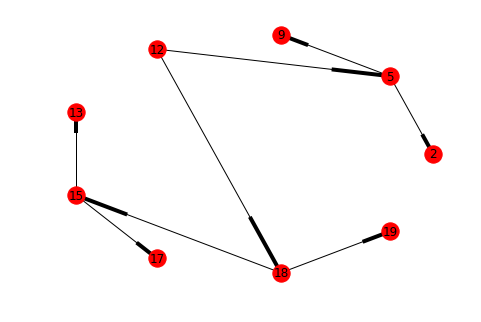

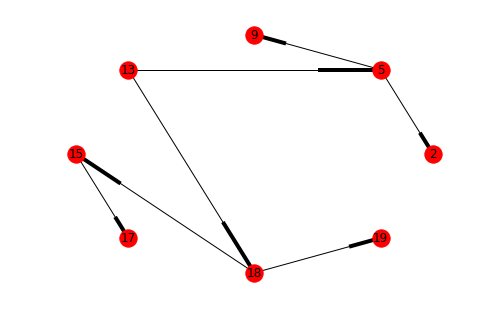

In [6]:
keys = [12, 5, 2, 9, 18, 15, 13, 17, 19]
T = BiSearchTree()
nodes = []
for i in keys:
    node = Node(i)
    T.iterative_insert(node)   
    nodes.append(node)

assert T.root   

T.draw()  # 绘制图
    
# T.inorder_walk(T.root)  # 顺序遍历
# T.preorder_walk(T.root)  # 深度优先
# T.postorder_walk(T.root)  # 自底向上

# print T.recursion_search(T.root, 6)  # 递归搜索
# print T.iterative_search(T.root, 6)  # 迭代搜索

# print T.get_minimum(T.root).key == T.get_minimum_recursive(T.root).key  # 找最小
# print T.get_maximum(T.root).key == T.get_maximum_recursive(T.root).key  # 找最大

# print T.get_successor(T.root).key  # 找后继
# print T.get_predecessor(T.root).key  # 找前驱

# T.delete(nodes[0])  # 删除节点
# T.draw()

# 删除操作

![](delete_op.png)